### Load and Explore the Data (EDA):

Load the dataset "log2.csv" into a Pandas DataFrame. 
Explore the dataset to understand its structure, distribution, missing values, and any other relevant characteristics.
Specifically, examine the distribution of the target variable ("Action") to understand class imbalances.

### Data Preparation:

Handle any missing values or outliers appropriately.
Encode categorical variables, such as "Action", into numerical format suitable for modeling.
Split the dataset into training and testing sets for model evaluation.

### Classification Algorithms:

Choose at least two classification algorithms suitable for this task. Common choices might include Decision Trees, Random Forests, Support Vector Machines, Logistic Regression, etc.
Implement the chosen algorithms using appropriate libraries (e.g., Scikit-learn).
Train the models on the training set and evaluate their performance on the testing set using appropriate metrics (e.g., accuracy, precision, recall, F1-score, etc.).
Experiment with hyperparameter tuning or feature selection techniques to improve the models' performance if necessary.

### Analysis and Discussion:

Discuss the findings from the exploratory data analysis (EDA) and how they might influence the choice of classification algorithms.
Explain the rationale behind the data preparation steps taken and how they contribute to better model performance.
Compare the performance of the different classification algorithms tested and justify the final choice of algorithm.
Comment on any observed accuracy differential between the training and testing sets and discuss potential reasons for any discrepancies.
 
### Documentation:

Document your entire process in a Jupyter Notebook using Markdown for explanations.
Include code blocks with Python code for data loading, preprocessing, model implementation, evaluation, and any other relevant tasks.
Provide detailed explanations for each step and your thought process behind decisions made.
Include visualizations (e.g., histograms, box plots, confusion matrices) to illustrate key points and findings.

### GitHub Repository:

Create a GitHub repository to host your Jupyter Notebook and any associated files.
Ensure that the repository is well-organized and includes clear documentation.
Include the link to your GitHub repository in your submission.
By following these steps, you should be able to complete the task effectively and provide a comprehensive analysis of the dataset and the performance of the classification algorithms tested.

1. **Import Libraries**:
   - Import necessary libraries for data manipulation, visualization, and machine learning algorithms.

2. **Load the Dataset**:
   - Use Pandas to read the dataset from a file into a DataFrame.

3. **Exploratory Data Analysis (EDA)**:
   - Examine dataset structure, data types, summary statistics, distributions, and identify missing values and outliers.

4. **Data Preprocessing**:
   - Handle missing values, encode categorical variables, scale numerical features, and split the dataset into features and labels.

5. **Split Data into Training and Testing Sets**:
   - Split the dataset into training and testing sets.

6. **Choose a Model**:
   - Select a machine learning algorithm suitable for the problem type.

7. **Train the Model**:
   - Train the selected model using the training dataset.

8. **Evaluate the Model**:
   - Evaluate the model's performance using the testing dataset.

9. **Tune Hyperparameters** (Optional):
   - Fine-tune the model's hyperparameters to improve performance.

10. **Make Predictions**:
    - Use the trained model to make predictions on new data.

11. **Evaluate and Iterate**:
    - Evaluate the model's performance on real-world data and iterate as necessary.

12. **Deploy the Model** (Optional):
    - If the model performs satisfactorily, deploy it in a production environment.

### Step 1: Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

### Step 2: Load the Dataset

In [2]:
df = pd.read_csv("log2.csv")

### Step 3: Exploratory Data Analysis (EDA)

#### Display the First  Rows:

In [3]:
df.head(10)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
5,51465,443,39975,443,3961,1595,2366,21,16,12,9,allow
6,60513,47094,45469,47094,320,140,180,6,7,3,3,allow
7,50049,443,21285,443,7912,3269,4643,23,96,12,11,allow
8,52244,58774,2211,58774,70,70,0,1,5,1,0,allow
9,50627,443,16215,443,8256,1674,6582,31,75,15,16,allow


#### Examine the Structure of the Dataset:

In [4]:
# Check the number of rows and columns in the dataset.
print("Shape of the dataset:", df.shape)

Shape of the dataset: (65532, 12)


#### Check Data Types:

In [5]:
df.info() 
""" 
helps to understand the data type and information about data, 
including the number of records in each column, data having null or not null, 
Data type, the memory usage of the dataset"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


' \nhelps to understand the data type and information about data, \nincluding the number of records in each column, data having null or not null, \nData type, the memory usage of the dataset'

In [6]:
print(df.dtypes)

Source Port              int64
Destination Port         int64
NAT Source Port          int64
NAT Destination Port     int64
Bytes                    int64
Bytes Sent               int64
Bytes Received           int64
Packets                  int64
Elapsed Time (sec)       int64
pkts_sent                int64
pkts_received            int64
Action                  object
dtype: object


In [7]:
# Check for Duplication
#The nunique() method returns the number of unique values for each column.
df.nunique()

Source Port             22724
Destination Port         3273
NAT Source Port         29152
NAT Destination Port     2533
Bytes                   10724
Bytes Sent               6683
Bytes Received           8814
Packets                  1116
Elapsed Time (sec)        915
pkts_sent                 749
pkts_received             922
Action                      4
dtype: int64

#### Summary Statistics for Numerical Columns:

In [8]:
#Calculate summary statistics for numerical columns (mean, median, standard deviation, etc.).
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [9]:
df.isnull()      
# Returns a boolean matrix, if the value is NaN then True otherwise False

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,False,False,False,False,False,False,False,False,False,False,False,False
65528,False,False,False,False,False,False,False,False,False,False,False,False
65529,False,False,False,False,False,False,False,False,False,False,False,False
65530,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum() 
# Returns the column names along with the number of NaN values in that particular column

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

In [11]:
print(df['Action'].value_counts())

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64


#### Visualisation of Relationships Between Variables:

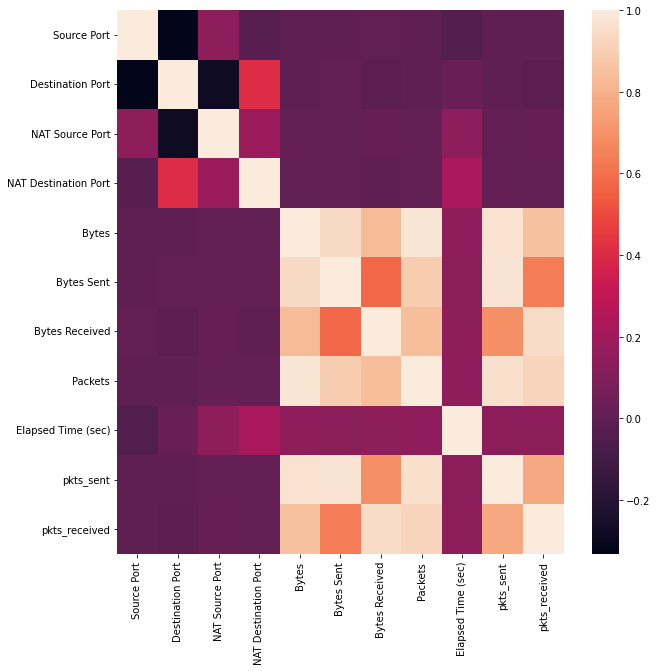

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

plt.show()

Given this understanding, there is a relationship between the number of packets sent and the bytes sent. More packets sent typically imply more bytes sent, as each packet carries a portion of the total data payload.
Similarly, the number of packets received correlates with the bytes received.

#### Target "ACTION" Distribution 

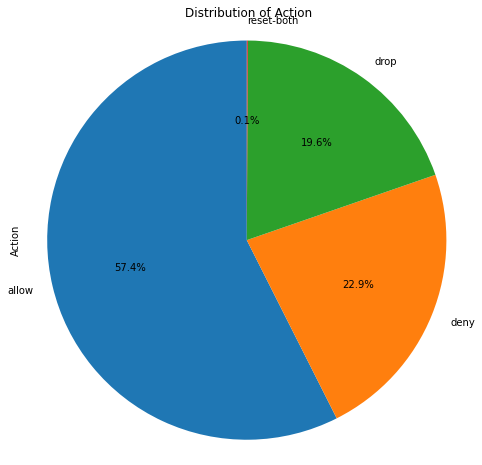

In [13]:
# Set the figure size
plt.figure(figsize=(8, 8))
# Plot pie chart
df['Action'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Action')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Action "reset-both" is very rare, this will be extremely hard to predict

#### Categorical Features 

In [14]:
#Categorical Features 
cat_features = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

Feature: Source Port
58638    840
27005    513
443      273
57470    222
49418    210
6881     177
0        173
50584    116
3478     105
26900    102
5588      87
42298     84
48817     82
45941     77
50265     75
Name: Source Port, dtype: int64



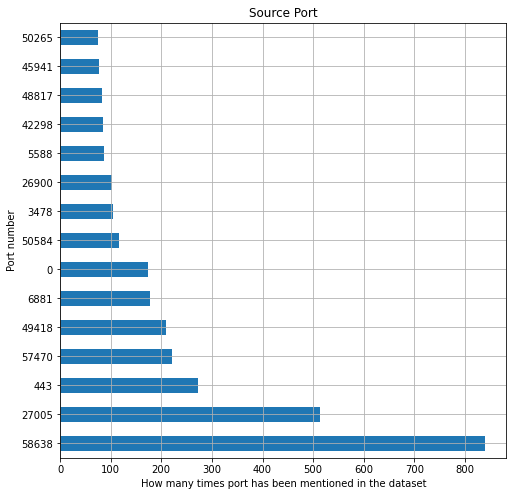

Feature: Destination Port
53       15414
445      12891
443      11684
80        4035
25174     1087
5900       909
37965      826
22114      767
64147      756
50584      717
57470      671
44847      626
35440      428
51505      375
26467      371
Name: Destination Port, dtype: int64



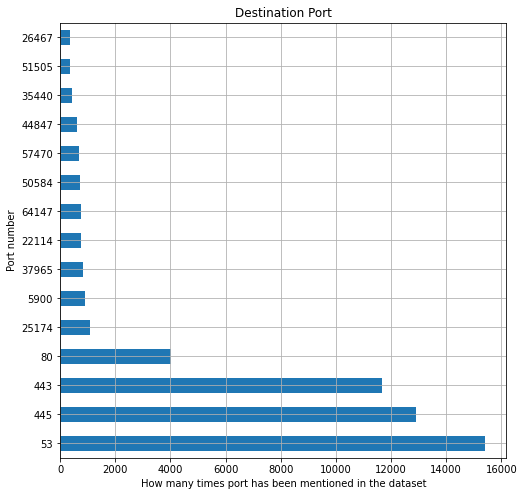

Feature: NAT Source Port
0        28432
48817       83
58638       51
50116       15
7986         5
30399        5
43757        5
57880        5
57596        5
60868        5
14591        5
22           4
19874        4
49244        4
50600        4
Name: NAT Source Port, dtype: int64



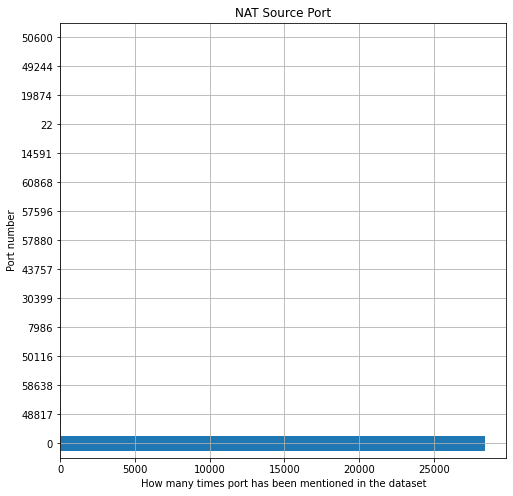

Feature: NAT Destination Port
0        28432
53       15094
443      11678
80        4028
27015      234
27017      160
123        156
3389       156
6881       143
5228       100
7000        94
27016       86
15000       84
5222        71
51413       69
Name: NAT Destination Port, dtype: int64



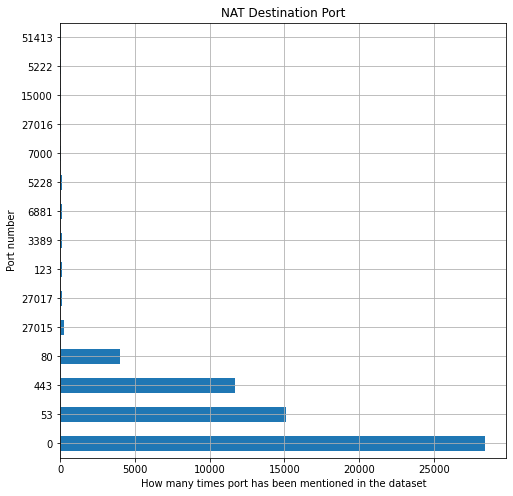

In [15]:
for f in cat_features:
    
    print('Feature:', f)
    print(df[f].value_counts()[0:15])
    print()
    
    plt.figure(figsize=(8, 8))
    df[f].value_counts()[0:15].plot(kind='barh')
    plt.title(f)
    plt.xlabel('How many times port has been mentioned in the dataset')
    plt.ylabel('Port number')
    plt.grid()
    plt.show()

#### Numerical Features 

visualisation of the range of each numerical feature from smallest to largest

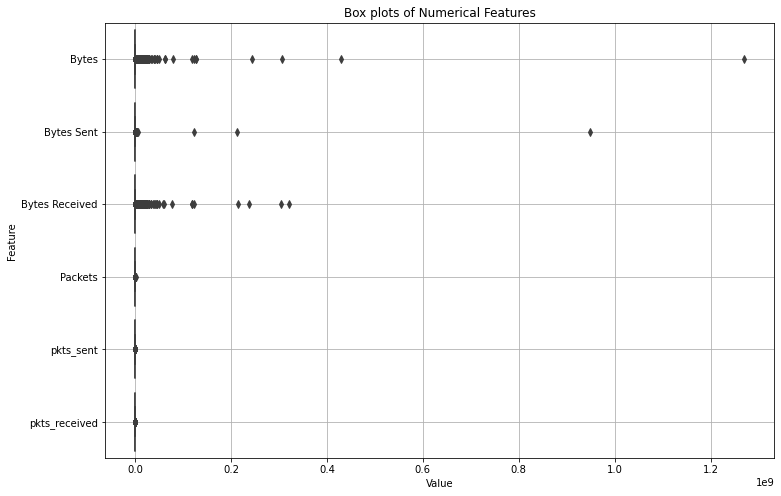

In [16]:
# Define the numerical features excluding 'Elapsed Time (sec)'
features_num = ['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'pkts_sent', 'pkts_received']

# Create box plots for each numerical feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[features_num], orient='h')
plt.title('Box plots of Numerical Features')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

Seems like packets and bytes have big difference in range and different units. It is time to use Normalization techniques :

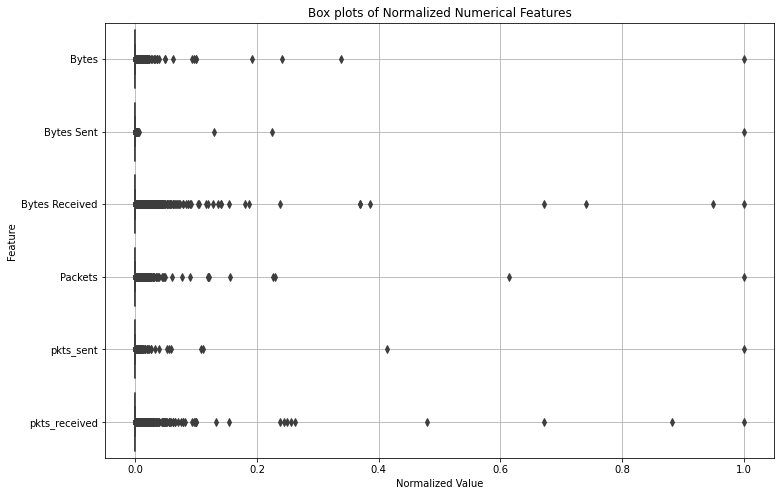

In [17]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the numerical features
df_normalized = df.copy()
df_normalized[features_num] = scaler.fit_transform(df_normalized[features_num])

# Create box plots for each normalized numerical feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_normalized[features_num], orient='h')
plt.title('Box plots of Normalized Numerical Features')
plt.xlabel('Normalized Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

Core of the method

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.


Why to normalize prior to model fitting?

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

## Target vs Features

#### Categorical Features 

Destination Port         int64
NAT Source Port          int64
NAT Destination Port

In [19]:
cat_features

['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

In [24]:
# Define custom colors for each action category
action_colors = {'allow': 'green', 'deny': 'red', 'drop': 'blue', 'reset-both': 'orange'}

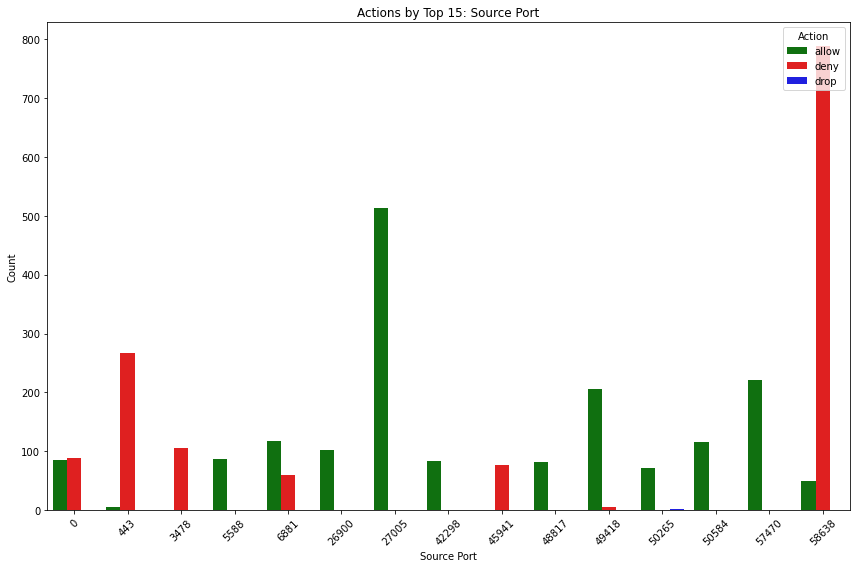

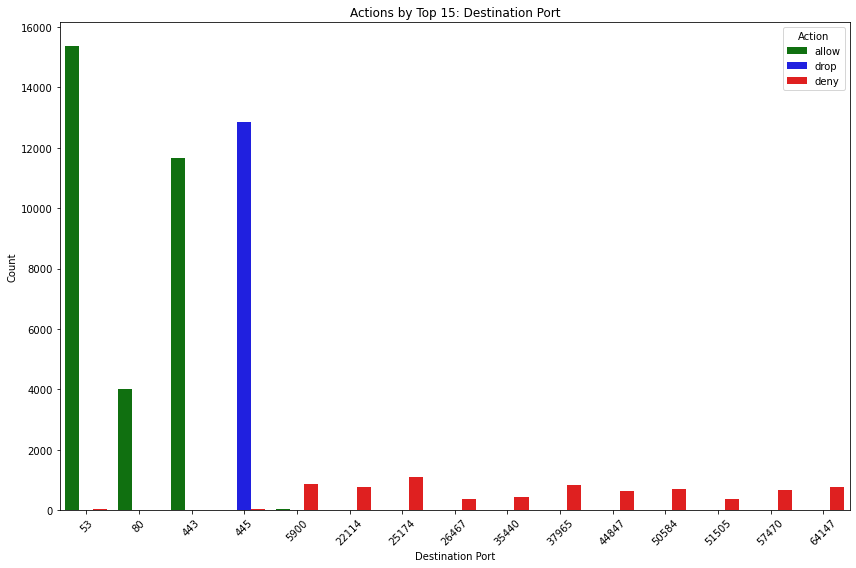

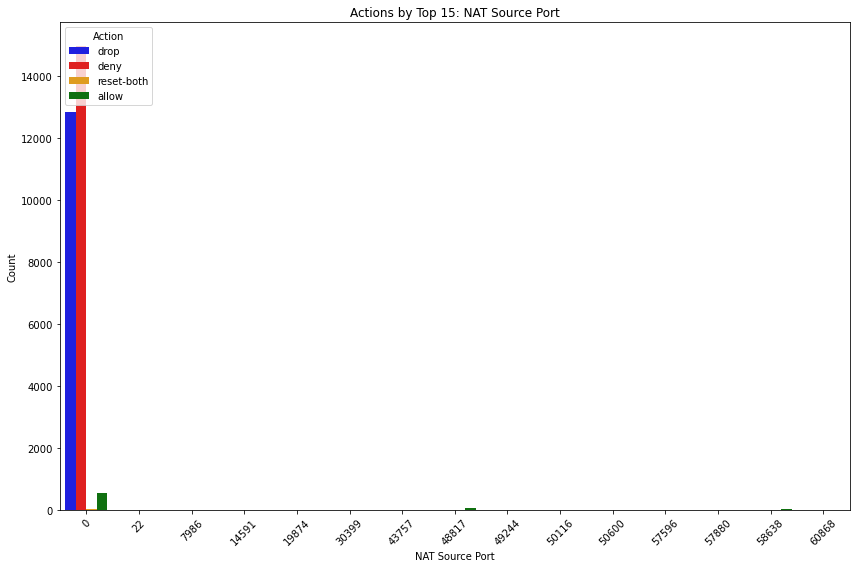

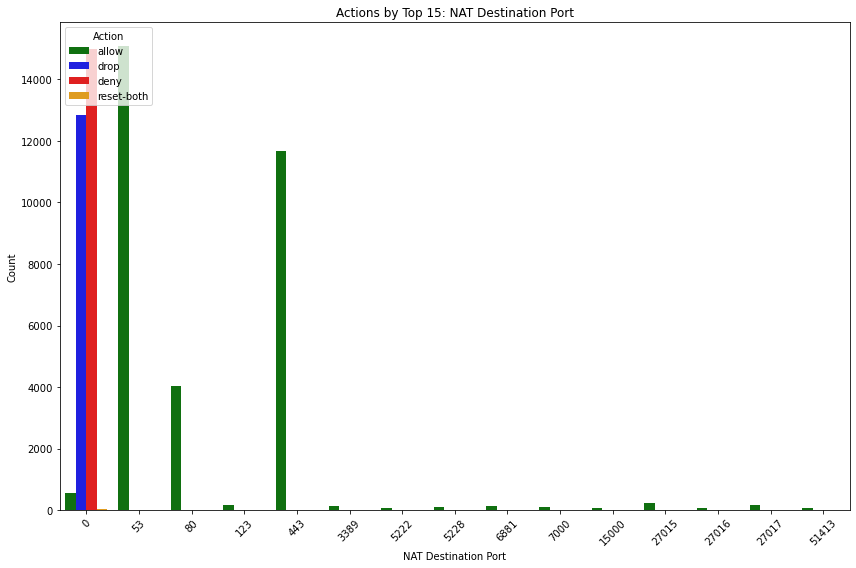

In [25]:

for f in cat_features: 
    # Get the top 15 ports
    top_15_ports = df[f].value_counts().head(15).index
    
    # Filter the DataFrame for the top 15 source ports
    df_top_ports = df_normalized[df_normalized[f].isin(top_15_ports)]
    
    # Create a grouped bar plot
    plt.figure(figsize=(12, 8))
    sns.countplot(x=f, hue='Action', data=df_top_ports, palette=action_colors)
    plt.title('Actions by Top 15: {}'.format(f))
    plt.xlabel(f)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Action')
    plt.tight_layout()
    plt.show()

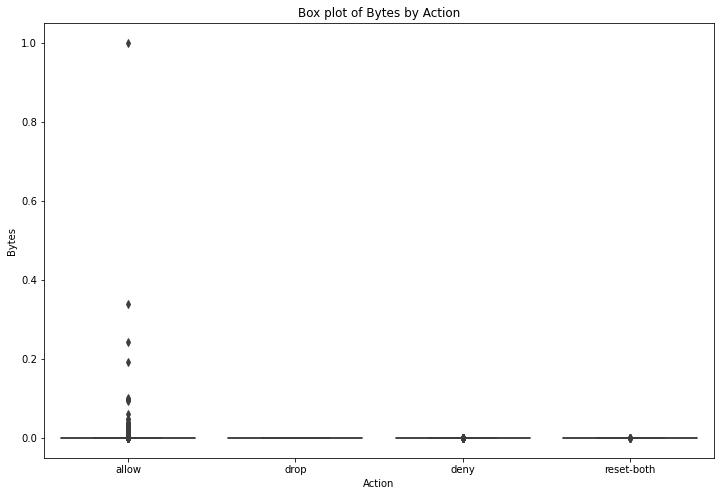

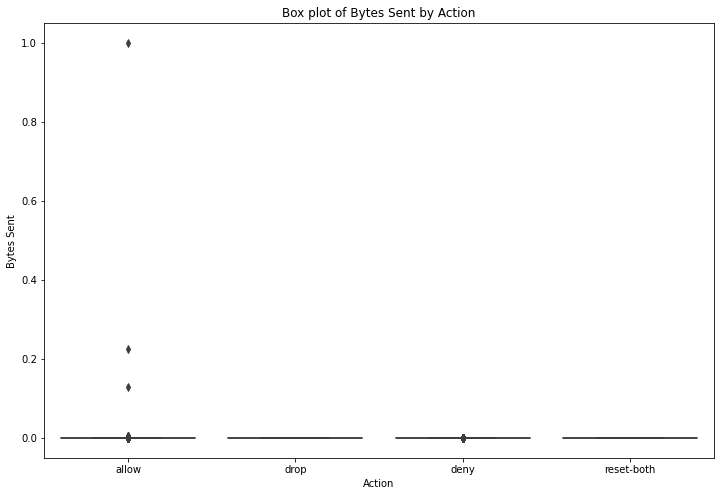

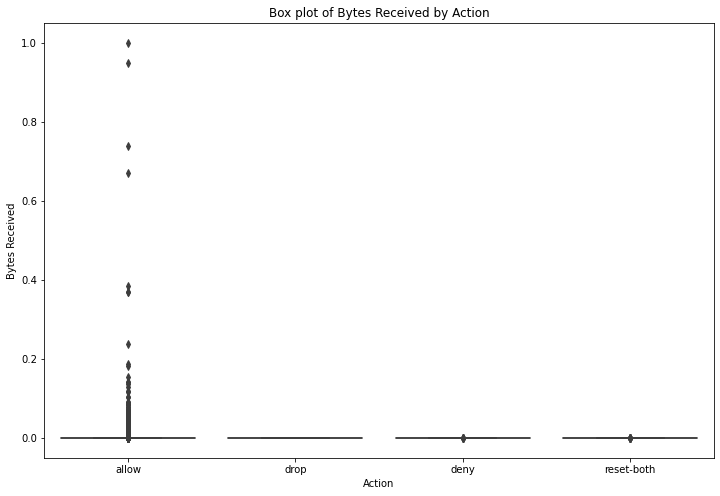

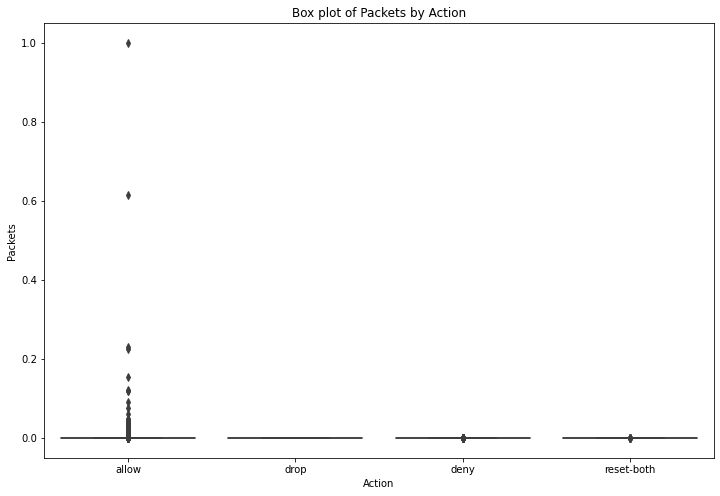

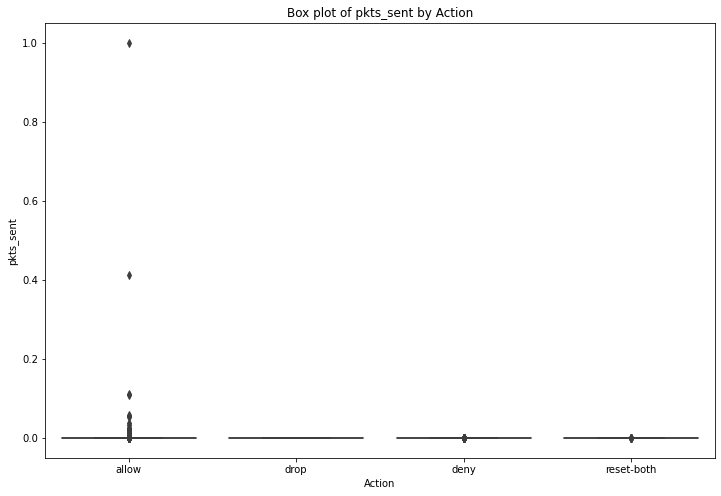

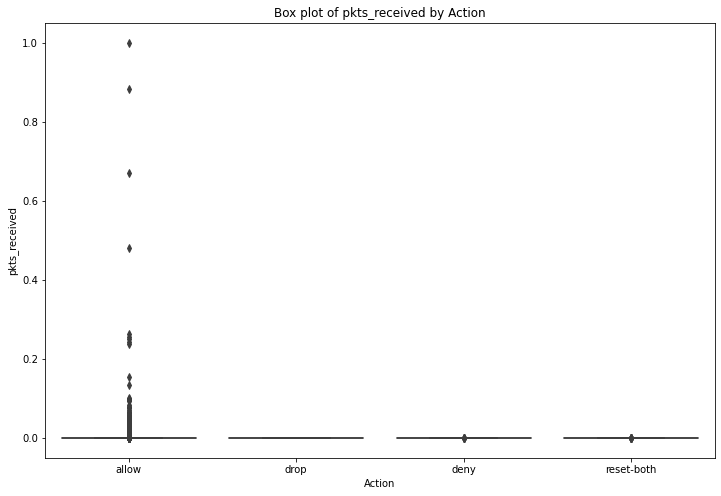

In [26]:
# Create box plots for each numerical feature grouped by the target variable
# Define the target variable 
target_variable = 'Action'

for feature in features_num:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=target_variable, y=feature, data=df_normalized)
    plt.title('Box plot of ' + feature + ' by ' + target_variable)
    plt.xlabel(target_variable)
    plt.ylabel(feature)
    plt.show()